In [1]:
# import library 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load first data
data1 = pd.read_csv('api_data_aadhar_enrolment_0_500000.csv')
data2 = pd.read_csv('api_data_aadhar_enrolment_500000_1000000.csv')
data3 = pd.read_csv('api_data_aadhar_enrolment_1000000_1006029.csv')

In [3]:
# concat all the data row wise into a  single dataframe 
enrollment_data = pd.concat([data1, data2, data3], axis = 0, ignore_index = True)
enrollment_data.shape

(1006029, 7)

In [4]:
enrollment_data

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0


In [5]:
enrollment_data[499997: 500003] # checking data consistency between data1 and data2

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
499997,26-10-2025,Andhra Pradesh,Medak,502256,0,1,0
499998,26-10-2025,Andhra Pradesh,Medak,502286,1,0,0
499999,26-10-2025,Andhra Pradesh,N. T. R,521402,1,0,0
500000,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0
500001,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0
500002,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0


In [6]:
enrollment_data[999999:1000004 ]   # checking data consistency between data2 and data3

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
999999,31-12-2025,Telangana,Hyderabad,500095,0,1,0
1000000,31-12-2025,Karnataka,Bidar,585330,2,3,0
1000001,31-12-2025,Karnataka,Bidar,585402,6,0,0
1000002,31-12-2025,Karnataka,Bidar,585413,1,0,0
1000003,31-12-2025,Karnataka,Bidar,585418,1,2,0


# DATA INSPECTION AND CLEANING
- removing invalid data
- removing duplicate values
- making data consistent 

In [7]:
# names of the columns 
enrollment_data.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [8]:
# rows and columsn 
enrollment_data.shape

(1006029, 7)

In [9]:
# data type and null values 
enrollment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [10]:
enrollment_data[enrollment_data['district'].str.isnumeric()].count()

date              22
state             22
district          22
pincode           22
age_0_5           22
age_5_17          22
age_18_greater    22
dtype: int64

In [11]:
enrollment_data[enrollment_data['district'].str.isnumeric()]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
23108,02-09-2025,100000,100000,100000,0,0,3
46946,03-09-2025,100000,100000,100000,0,0,1
97816,08-09-2025,100000,100000,100000,0,0,1
115798,09-09-2025,100000,100000,100000,0,0,1
153156,11-09-2025,100000,100000,100000,0,0,2
160195,12-09-2025,100000,100000,100000,0,0,2
261778,19-09-2025,100000,100000,100000,0,0,1
272731,20-09-2025,100000,100000,100000,0,0,1
470934,24-10-2025,100000,100000,100000,0,1,0
762744,15-11-2025,100000,100000,100000,0,0,3


In [12]:
# state column has numeric values which is invalid 
enrollment_data[enrollment_data['state'] == '100000' ]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
23108,02-09-2025,100000,100000,100000,0,0,3
46946,03-09-2025,100000,100000,100000,0,0,1
97816,08-09-2025,100000,100000,100000,0,0,1
115798,09-09-2025,100000,100000,100000,0,0,1
153156,11-09-2025,100000,100000,100000,0,0,2
160195,12-09-2025,100000,100000,100000,0,0,2
261778,19-09-2025,100000,100000,100000,0,0,1
272731,20-09-2025,100000,100000,100000,0,0,1
470934,24-10-2025,100000,100000,100000,0,1,0
762744,15-11-2025,100000,100000,100000,0,0,3


In [13]:
enrollment_data[enrollment_data['state'] == '100000' ].count()

date              22
state             22
district          22
pincode           22
age_0_5           22
age_5_17          22
age_18_greater    22
dtype: int64

In [14]:
# since state names=text we can remove such rows where state = 100000
enrollment_data[enrollment_data['state'].str.isnumeric()].shape[0]

22

In [15]:
len(enrollment_data)

1006029

In [16]:
# percentage of invalid values in state column 
x = (22/1006029)*100 
print(f'percentage of invalid data in state column: {round(x,4)}%')

percentage of invalid data in state column: 0.0022%


In [17]:
# removing these rows with invalid data to improve data quality 
enrollment_data = enrollment_data[enrollment_data['state'] != '100000']

In [18]:
enrollment_data.shape

(1006007, 7)

total number of rows changed from 1006029 -> 1006007

In [19]:
# check if theres any other invalid data in the state column
enrollment_data[enrollment_data['state'].str.isnumeric()].shape[0]

0

In [20]:
# number of duplicate values if exist
enrollment_data.duplicated().sum()

22956

In [21]:
1006007 - 22956

983051

In [22]:
enrollment_data[enrollment_data.duplicated()]

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
360605,13-10-2025,Punjab,Jalandhar,144041,2,1,0
360606,13-10-2025,Punjab,Jalandhar,144101,1,0,0
360607,13-10-2025,Punjab,Jalandhar,144102,2,0,0
360608,13-10-2025,Punjab,Jalandhar,144418,1,0,0
360609,13-10-2025,Punjab,Jalandhar,144419,1,0,0
...,...,...,...,...,...,...,...
1001611,31-12-2025,Telangana,Hyderabad,500045,4,5,1
1001612,31-12-2025,Telangana,Hyderabad,500057,0,2,0
1001613,31-12-2025,Telangana,Hyderabad,500061,4,2,0
1001614,31-12-2025,Telangana,Hyderabad,500062,1,4,0


In [23]:
# dropping duplicates 
enrollment_data = enrollment_data.drop_duplicates()

In [24]:
a = enrollment_data.duplicated().any()
print(a)

False


In [25]:
enrollment_data.shape

(983051, 7)

In [26]:
# drop irrelevant columns
enrollment_data.drop(columns = ['district', 'pincode'], inplace = True)

In [27]:
# states data
enrollment_data['state'].nunique()

54

In [28]:
enrollment_data['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', 'Daman & Diu',
       'West Bangal', 'Westbengal', 'West bengal', 'andhra pradesh',
       'ODISHA', 'WESTBENGAL'], dtype=object)

In [29]:
# sort the names 
sorted(enrollment_data['state'].unique())

['Andaman & Nicobar Islands',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra & Nagar Haveli',
 'Dadra and Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jammu And Kashmir',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'ODISHA',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'The Dadra And Nagar Haveli And Daman And Diu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'WEST BENGAL',
 'WESTBENGAL',
 'West  Bengal',
 'West Bangal',
 'West Bengal',
 'West bengal',
 'Westbengal',
 'andhra pradesh']

In [30]:
# common cleaning 
enrollment_data['state'] = enrollment_data['state'].str.replace('&' , 'and') # replace & with and 

In [31]:
enrollment_data['state'] = enrollment_data['state'].str.title() # convert text -> title case 

In [32]:
enrollment_data['state'] = enrollment_data['state'].str.replace(r'\s+', ' ', regex=True)

In [33]:
enrollment_data['state'].nunique()

43

In [34]:
# create dictionary to map incorrect names with correct one -> data consistency
state_dict = {
    # Andaman
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands',

    # Dadra & Daman (merged UT)
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu':'Dadra and Nagar Haveli and Daman and Diu',

    # Jammu & Kashmir
    'Jammu And Kashmir': 'Jammu and Kashmir',

    # Odisha
    'Odisha': 'Odisha',
    'Orissa': 'Odisha',

    # Puducherry
    'Pondicherry': 'Puducherry',

    # Andhra Pradesh
    'Andhra Pradesh': 'Andhra Pradesh',

    # West Bengal
    'West Bengal': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West Bengal': 'West Bengal'
}


In [35]:
enrollment_data['state'] = enrollment_data['state'].replace(state_dict)

In [36]:
enrollment_data['state'].nunique()

36

In [37]:
enrollment_data.head()

,date,state,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,11,61,37
1,09-03-2025,Karnataka,14,33,39
2,09-03-2025,Uttar Pradesh,29,82,12
3,09-03-2025,Uttar Pradesh,62,29,15
4,09-03-2025,Karnataka,14,16,21


In [38]:
enrollment_data = enrollment_data.rename(columns= {'age_0_5':'new_born', 'age_5_17':'minor', 'age_18_greater': 'adult'})
enrollment_data.columns

Index(['date', 'state', 'new_born', 'minor', 'adult'], dtype='object')

# Feature engineering 

In [39]:
# creating another calculated column for total number of enrollments  
enrollment_data['total'] = enrollment_data['new_born'] + enrollment_data['minor'] +  enrollment_data['adult']
enrollment_data.head()

,date,state,new_born,minor,adult,total
0,02-03-2025,Meghalaya,11,61,37,109
1,09-03-2025,Karnataka,14,33,39,86
2,09-03-2025,Uttar Pradesh,29,82,12,123
3,09-03-2025,Uttar Pradesh,62,29,15,106
4,09-03-2025,Karnataka,14,16,21,51


In [40]:
enrollment_data.tail()

,date,state,new_born,minor,adult,total
1006024,31-12-2025,West Bengal,2,0,0,2
1006025,31-12-2025,West Bengal,2,2,0,4
1006026,31-12-2025,West Bengal,0,1,0,1
1006027,31-12-2025,West Bengal,1,0,0,1
1006028,31-12-2025,West Bengal,2,1,0,3


# Aggregate data by states + data standardization

In [41]:
# 1. group data using states 
# 2. convert numbers -> ratios 

In [42]:
#export the cleaned data first 
enrollment_data.to_csv('cleaned_enrolled_data.csv', index = False)

In [43]:
enrollment_data.head(2)

,date,state,new_born,minor,adult,total
0,02-03-2025,Meghalaya,11,61,37,109
1,09-03-2025,Karnataka,14,33,39,86


In [44]:
# aggregate data by state using groupby
state_enrol_data = enrollment_data.groupby('state')[['new_born','minor','adult','total']].sum() 

#Total adhaar enrollments in each state, broken down by age groups (0–5, 5–17, and 18+, total population)
state_enrol_data

,new_born,minor,adult,total
state,,,,
Andaman and Nicobar Islands,469,32,0,501
Andhra Pradesh,109394,13414,1465,124273
Arunachal Pradesh,1914,2176,150,4240
Assam,137970,64834,22555,225359
Bihar,254911,327043,11799,593753
Chandigarh,2377,210,33,2620
Chhattisgarh,79653,18158,1962,99773
Dadra and Nagar Haveli and Daman and Diu,1484,248,50,1782
Delhi,67844,21971,3023,92838


In [45]:
state_enrol_data.shape

(36, 4)

In [46]:
# sort the state with maximum to minimun number of enrollemts by total population 
state_enrol_data = state_enrol_data.sort_values(by='total', ascending=False)
state_enrol_data

,new_born,minor,adult,total
state,,,,
Uttar Pradesh,511727,473205,17699,1002631
Bihar,254911,327043,11799,593753
Madhya Pradesh,363244,115172,9476,487892
West Bengal,270419,90335,8495,369249
Maharashtra,274274,81069,8103,363446
Rajasthan,224977,110131,5483,340591
Gujarat,188709,70270,16063,275042
Assam,137970,64834,22555,225359
Karnataka,176178,33402,10038,219618


**states with maximum population has maximum number of enrollments same with the states  with least population**

In [47]:
# state with max no. of  enrollments 
print(state_enrol_data['total'].nlargest(1))

print()

# state with minimum no. of  enrollments
print(state_enrol_data['total'].nsmallest(1))

state
Uttar Pradesh    1002631
Name: total, dtype: int64

state
Lakshadweep    199
Name: total, dtype: int64


In [48]:
# state with max no. of enrollments in new borns  
print(state_enrol_data['new_born'].nlargest(1))

print()

# state with minimum no. of enrollments in new borns  
print(state_enrol_data['new_born'].nsmallest(1))

state
Uttar Pradesh    511727
Name: new_born, dtype: int64

state
Lakshadweep    188
Name: new_born, dtype: int64


In [49]:
# state with max no. of enrollments  in minors 
print(state_enrol_data['minor'].nlargest(1))

print()

# state with minimum no. of enrollments in  minors 
print(state_enrol_data['minor'].nsmallest(1))

state
Uttar Pradesh    473205
Name: minor, dtype: int64

state
Lakshadweep    10
Name: minor, dtype: int64


In [50]:
# state with max no. of enrollments  in adults
print(state_enrol_data['adult'].nlargest(1))

print()

# state with minimum no. of enrollments in  minors 
print(state_enrol_data['adult'].nsmallest(1))

state
Meghalaya    35078
Name: adult, dtype: int64

state
Andaman and Nicobar Islands    0
Name: adult, dtype: int64


<u> Meghalaya : has highest number of adult enrollments 

In [51]:
state_enrol_data[state_enrol_data['new_born'] ==0]

,new_born,minor,adult,total
state,,,,


In [52]:
state_enrol_data[state_enrol_data['minor'] ==0]

,new_born,minor,adult,total
state,,,,


In [53]:
state_enrol_data[state_enrol_data['adult']==0]

,new_born,minor,adult,total
state,,,,
Andaman and Nicobar Islands,469,32,0,501


In [54]:
state_enrol_data[state_enrol_data['total'] ==0]

,new_born,minor,adult,total
state,,,,


In [55]:
# total number of enrollments in all the states 
total_enrol = state_enrol_data['total'].sum()
total_enrol

5331546

In [56]:
# total enrollments in adults
adults = state_enrol_data['adult'].sum()
adults

166249

In [57]:
# total enrollments in minor 
minors= state_enrol_data['minor'].sum()
minors

1690908

In [58]:
# total enrollments for new borns
new_born = state_enrol_data['new_born'].sum()
new_born

3474389

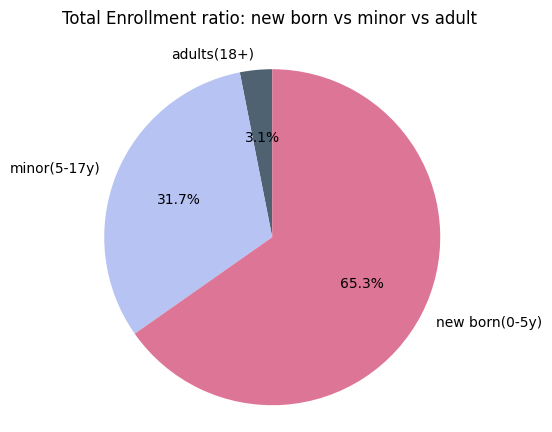

In [59]:
# calculate each category participation in total enwollments 
age_based_enrol = ['adults(18+)', 'minor(5-17y)','new born(0-5y)']
amount_enrol = [168136,1720383,3546965]

colors = ['#4F6272', '#B7C3F3', '#DD7596']
plt.pie(amount_enrol, labels=age_based_enrol , colors = colors,  autopct='%1.1f%%', startangle=90)
plt.title('Total Enrollment ratio: new born vs minor vs adult \n')
plt.axis('equal')
plt.show()


# data standardization

In [60]:
# new born ratio 
state_enrol_data['new_born'] = round((state_enrol_data['new_born'] / state_enrol_data['total'])*100,1)

# minor ratio 
state_enrol_data['minor'] = round((state_enrol_data['minor'] / state_enrol_data['total'])*100,1)

# adult ratio 
state_enrol_data['adult'] = round((state_enrol_data['adult'] / state_enrol_data['total'])*100,1)

state_enrol_data

,new_born,minor,adult,total
state,,,,
Uttar Pradesh,51.0,47.2,1.8,1002631
Bihar,42.9,55.1,2.0,593753
Madhya Pradesh,74.5,23.6,1.9,487892
West Bengal,73.2,24.5,2.3,369249
Maharashtra,75.5,22.3,2.2,363446
Rajasthan,66.1,32.3,1.6,340591
Gujarat,68.6,25.5,5.8,275042
Assam,61.2,28.8,10.0,225359
Karnataka,80.2,15.2,4.6,219618


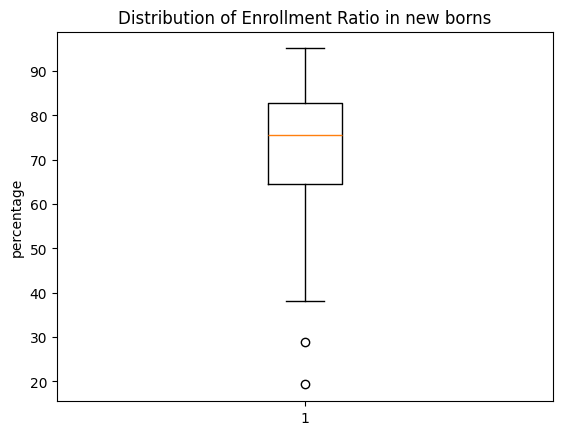

In [61]:
# boxplot for outlier identification of enrollments in new born 
plt.boxplot(state_enrol_data['new_born'])
plt.title('Distribution of Enrollment Ratio in new borns')
plt.ylabel('percentage')
plt.show()

In [62]:
state_enrol_data[state_enrol_data['new_born'] < 40]

,new_born,minor,adult,total
state,,,,
Meghalaya,19.3,48.6,32.1,109239
Nagaland,28.9,63.9,7.3,15429
Manipur,38.2,59.8,2.0,13199


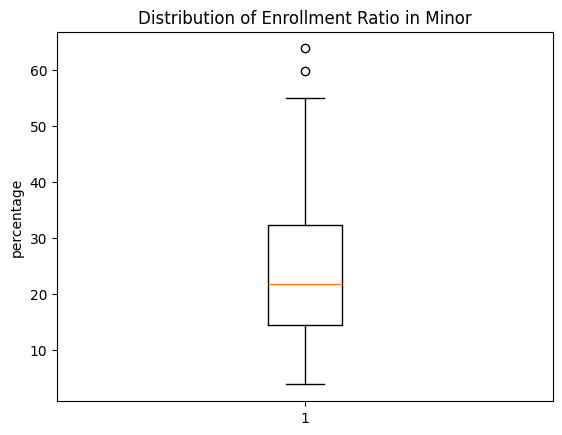

In [63]:
# boxplot for outlier identification of enrollments in minor 
plt.boxplot(state_enrol_data['minor'])
plt.title('Distribution of Enrollment Ratio in Minor')
plt.ylabel('percentage')
plt.show()

In [64]:
state_enrol_data[state_enrol_data['minor'] > 56]

,new_born,minor,adult,total
state,,,,
Nagaland,28.9,63.9,7.3,15429
Manipur,38.2,59.8,2.0,13199


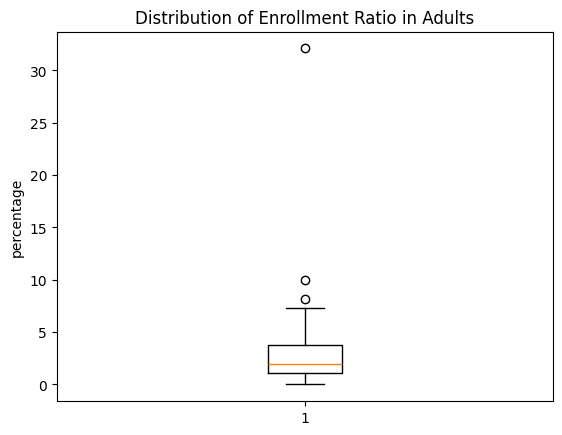

In [65]:
# boxplot for outlier identification of enrollments in adults
plt.boxplot(state_enrol_data['adult'])
plt.title('Distribution of Enrollment Ratio in Adults')
plt.ylabel('percentage')
plt.show()

In [66]:
state_enrol_data[state_enrol_data['adult'] > 8]

,new_born,minor,adult,total
state,,,,
Assam,61.2,28.8,10.0,225359
Meghalaya,19.3,48.6,32.1,109239
Mizoram,70.0,21.8,8.2,5774


These outlier states are in North-East India, which typically have small population 

In [67]:
state_enrol_data.loc['Meghalaya']

new_born        19.3
minor           48.6
adult           32.1
total       109239.0
Name: Meghalaya, dtype: float64

In [68]:
national_avg  = round(state_enrol_data[['new_born','minor','adult', 'total']].mean(), 1)

In [69]:
state_enrol_data.loc['national_avg'] = national_avg

In [70]:
state_enrol_data

,new_born,minor,adult,total
state,,,,
Uttar Pradesh,51.0,47.2,1.8,1002631.0
Bihar,42.9,55.1,2.0,593753.0
Madhya Pradesh,74.5,23.6,1.9,487892.0
West Bengal,73.2,24.5,2.3,369249.0
Maharashtra,75.5,22.3,2.2,363446.0
Rajasthan,66.1,32.3,1.6,340591.0
Gujarat,68.6,25.5,5.8,275042.0
Assam,61.2,28.8,10.0,225359.0
Karnataka,80.2,15.2,4.6,219618.0


In [71]:
# compare outlier states with national avg 
outlier_state = state_enrol_data.loc[['Assam','Meghalaya','Mizoram', 'Manipur', 'Nagaland', 'national_avg']]
outlier_state.drop('total', axis = 1, inplace = True)
outlier_state

,new_born,minor,adult
state,,,
Assam,61.2,28.8,10.0
Meghalaya,19.3,48.6,32.1
Mizoram,70.0,21.8,8.2
Manipur,38.2,59.8,2.0
Nagaland,28.9,63.9,7.3
national_avg,71.4,25.0,3.6


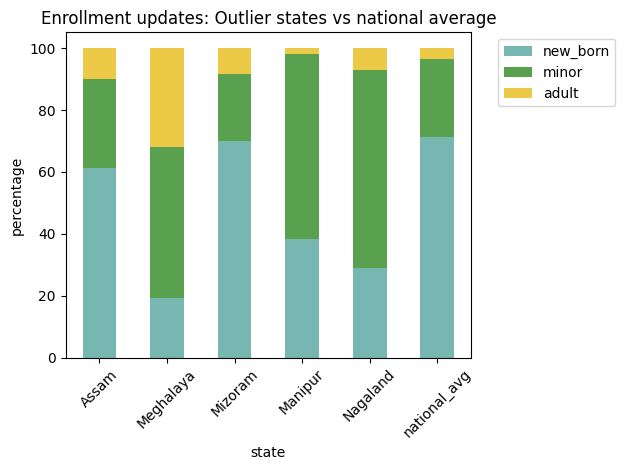

In [72]:
colors = ['#76B7B2','#59A14F','#EDC948']
outlier_state.plot( kind = 'bar' , stacked = True , mark_right=True , ylabel = 'percentage',color=colors)
plt.title('Enrollment updates: Outlier states vs national average')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()